# Credit Card Customer Segmentation

In this project, we'll assume the role of data scientists at a credit card company.Our objective is to categorize the company's clients based on their information, enabling us to devise tailored strategies for different customer types.

For example, the company might consider offering increased credit limits to customers who frequently use the card but spend conservatively. Alternatively, incentives could be designed for individuals with high incomes who use the card less than anticipated. Before implementing such strategies, we must first group customers effectively.

Fortunately, most of the dataset has already been cleaned, and we will utilize the k-means algorithm to segment the data. Our task involves providing the company with distinct groups for each client, along with explanations outlining the unique characteristics of these groups and the key factors driving their distinctions.

To ensure the algorithm's appropriate use and meet the company's objectives, we'll undertake the following steps:

- Analyze the dataset;
- Prepare the data for modeling;
- Find an appropriate number of clusters;
- Segment the data;
- Interpret and explain the results.

Here's the data dictionary:

- ```customer_id```: unique identifier for each customer.
- ```age```: customer age in years.
- ```gender```: customer gender (M or F).
- ```dependent_count```: number of dependents of each customer.
- ```education_level```: level of education ("High School", "Graduate", etc.).
- ```marital_status```: marital status ("Single", "Married", etc.).
- ```estimated_income```: the estimated income for the customer projected by the data science team.
- ```months_on_book```: time as a customer in months.
- ```total_relationship_count```: number of times the customer contacted the company.
- ```months_inactive_12_mon```: number of months the customer did not use the credit card in the last 12 months.
- ```credit_limit```: customer's credit limit.
- ```total_trans_amount```: the overall amount of money spent on the card by the customer.
- ```total_trans_count```: the overall number of times the customer used the card.
- ```avg_utilization_ratio```: daily average utilization ratio.

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Setting Seaborn style
sns.set_style('whitegrid')

# Displaying matplotlib plots inline
%matplotlib inline

In [2]:
# Loading customer segmentation data from a CSV file
customer = pd.read_csv('customer_segmentation.csv')

# Exploratory Data Analysis

Let's take a look at the dataset to gather some insights. We'll check its size, the number of columns, the data types in each column, and also examine if there are any missing values.

In [3]:
# Displaying information about the DataFrame
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

The dataset contains 10,127 rows and 14 columns:

- 9 columns have integer data types:```customer_id```,```age```,```dependent_count```,```estimated_income```,```months_on_book```,```total_relationship_count```,```months_inactive_12_mon```,```total_trans_amount```, and ```total_trans_count```.

- 3 columns have object data types: ```gender```,```education_level```,and ```marital_status```,
- 2 columns have float data types: ```credit_limit``` and ```avg_utilization_ratio```.

Moreover, all entries are non-null, indicating the absence of missing values.

Next, we will assess the correlation within the dataset. To do this, we'll exclude the customer_id column, which serves as a unique identifier without significant analytical value.

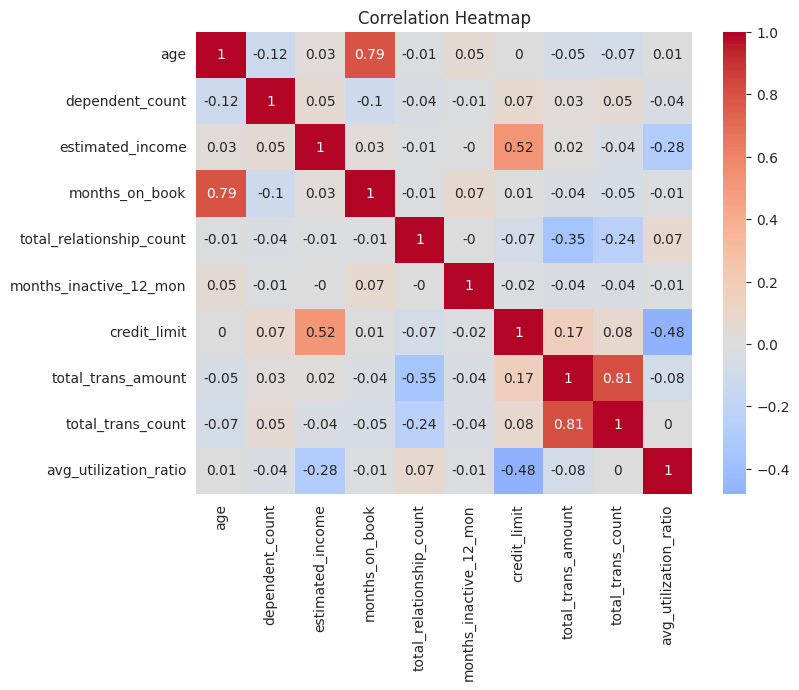

In [4]:
# Calculate the correlation matrix
correlation_matrix = customer.drop('customer_id', axis=1).corr().round(2)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
)
plt.title('Correlation Heatmap')
plt.show()

The heatmap uses colors ranging from orange to red to indicate a positive relationship between two variables, while shades of light blue to blue denote a negative relationship. The sign (positive or negative) determines whether the relationship is positive or inverse. The numerical values indicate the strength of the relationship. By observing the color intensity, we can quickly assess the strength of the relationship without checking the actual numbers: darker colors represent stronger relationships and lighter color represent weaker relationships.

Based on the heatmap, several key observations emerge:

- ```Age``` exhibits a strong positive correlation (0.79) with ```months_on_book```, indicating that older customers tend to have longer relationships with the company.

- ```Credit_limit``` and ```estimated_income``` are positively correlated (0.52), suggesting that customers with higher credit limits also tend to have higher incomes.

- There's a strong positive correlation (0.81) between ```total_trans_count``` and ```total_trans_amount```, implying that customers who make more transactions also spend more money.

- ```Credit_limit``` and ```avg_utilization_ratio``` show a negative correlation (-0.48), indicating that customers with higher credit limits tend to utilize a smaller proportion of their available credit.

With these insights in mind, we will proceed to visualize the distribution of each numeric column to understand the frequency distribution within intervals.


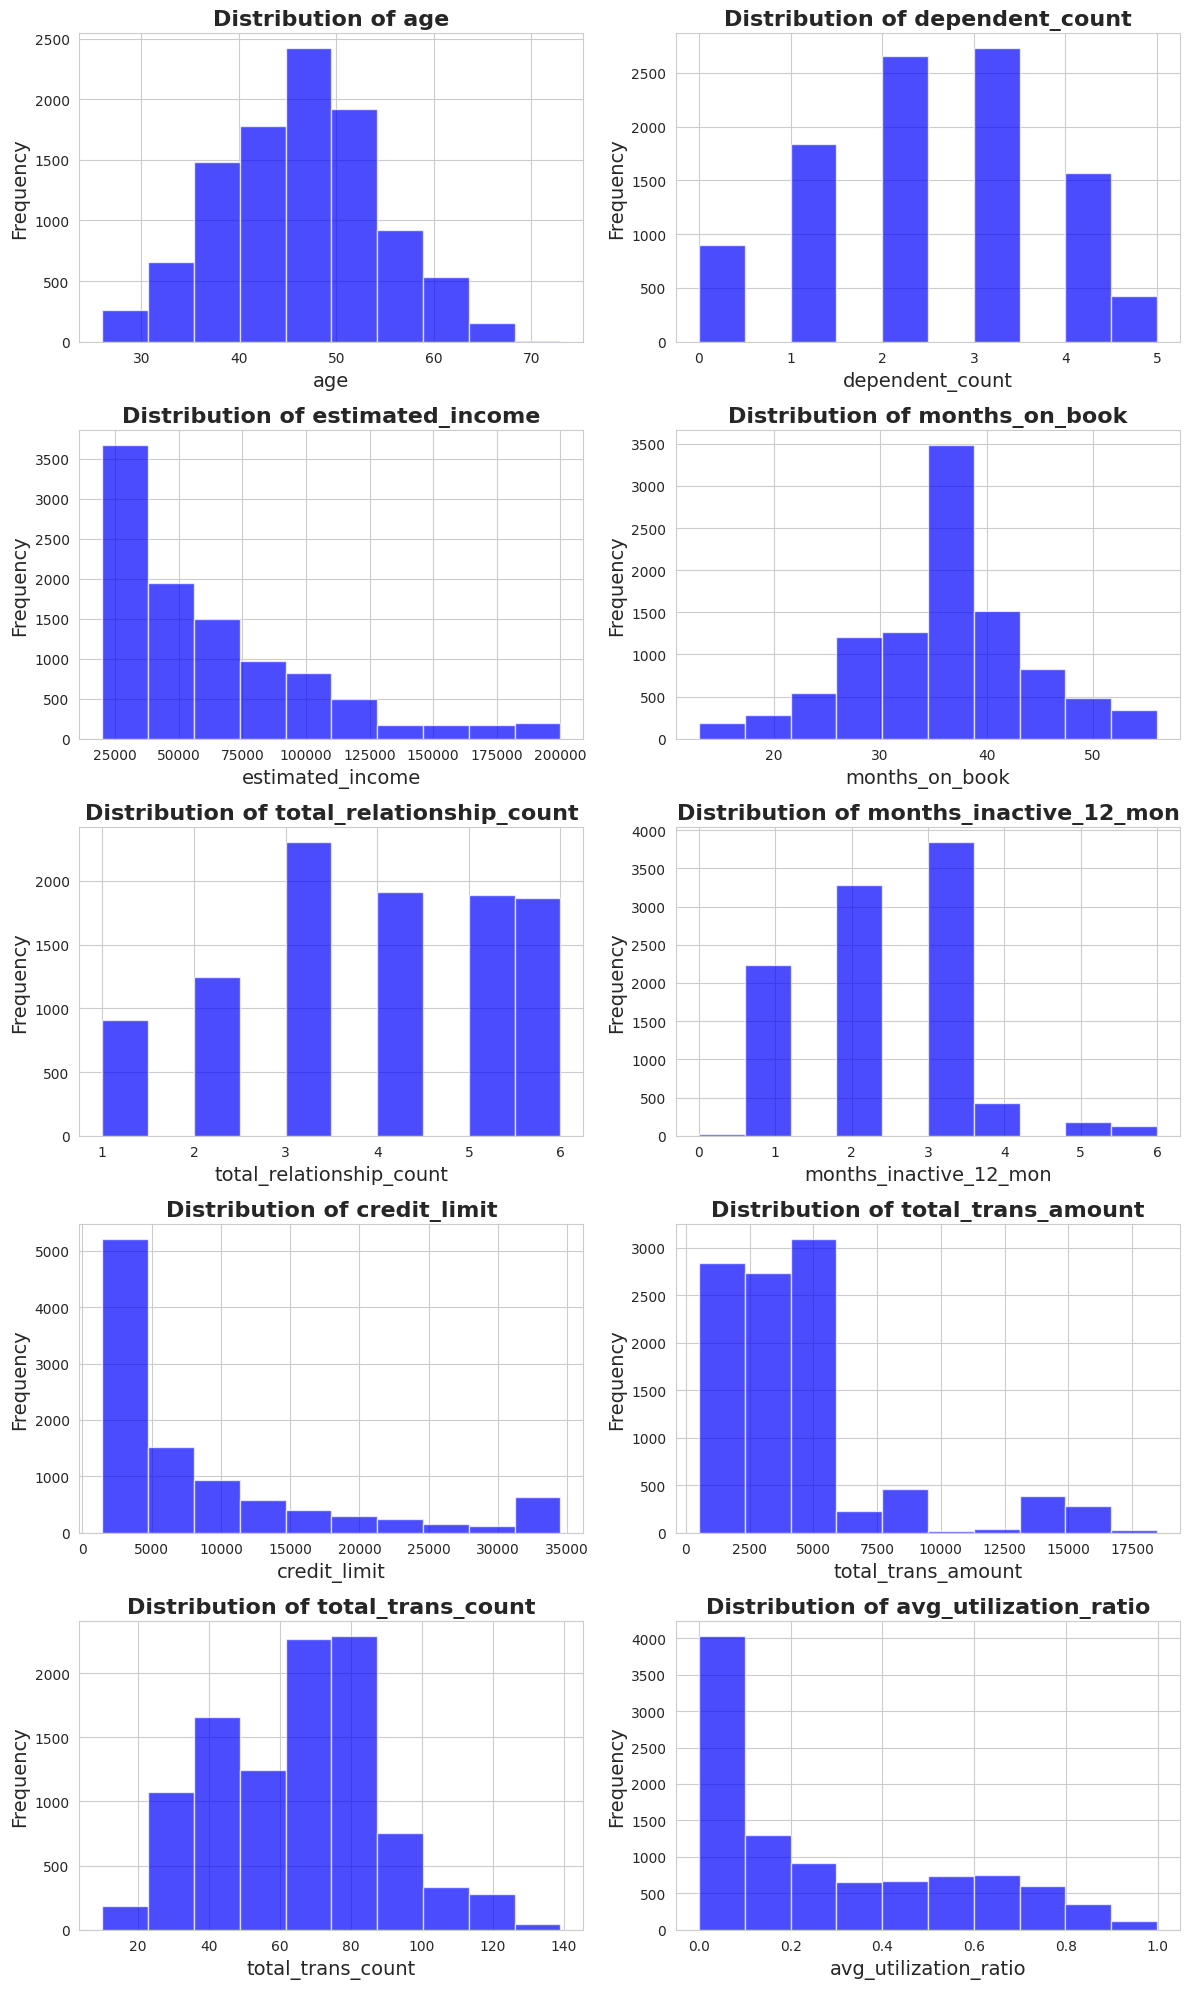

In [5]:
# Select numeric columns from the dataset
numeric_columns = customer.select_dtypes(include=['int64', 'float64'])

# Define the number of rows and columns for the subplot grid
num_rows = 5
num_cols = 2

# Create subplots grid for multiple plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot the distribution of each numeric column
for idx, column in enumerate(numeric_columns.columns[1:], start=1):
    ax = axes[idx - 1]  # Get the current subplot
    ax.hist(numeric_columns[column], color='blue', alpha=0.7)
    
    # Customize plot appearance
    ax.set_title(f"Distribution of {column}", fontsize=16, weight='bold')
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel("Frequency", fontsize=14)
    ax.grid(True)
    
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

We can gain some insights from the distribution graphs:

- We can gain insights from the distribution graphs:```age```,```dependent_count```,```months_on_book```,```total_relationship_count```,and ```total_trans_count``` tend to follow a normal distribution.

- ```estimated_income```,```month_inactive_12_mon```,```credit_limit```,```total_trans_amount```,and ```avg_utilization_ratio``` exhibit right-skewed distributions.

Here are some key observations:

- The majority of the company's customers fall within the age range of 35 to 55 years, with the highest concentration around 45 to 50 years old. This suggests that customer base is predominantly middle-aged.
- Most customers have 2 or 3 dependents, indicating that a significant portion of the customers have family responsibilities. This information can be useful for targeted marketing efforts aimed at families.
- The majority of customers earn an approximate annual salary of $ \$25,000-\$50,000 $. As the salary level increases beyond this amount, the number of customers who fall into those higher salary brackets decreases.This highlights an opportunity to explore strategies that cater to customers with varying income levels. 
- Most customers remain with the company for 35 to 40 months. This suggests a moderate level of customer loyalty, which we can leverage to enhance customer retention strategies.
- A substantial number of customers have reached out more than 3 times, indicating active engagement. This engagement presents an avenue to foster stronger customer relationships and gather feedback.
- Most customers' credit cards remained inactive for less than 3 months within the last 12 months. This could be due to customers using their cards for specific needs or seasonal spending.
- The concentration of credit limits below 5000 points, followed by a range of 5000 to 10,000 points, reveals the distribution of credit limits among customers. This information can guide decisions related to credit limit offerings.
- The majority of customers exhibit total transaction amounts of less than $5,000 and engage in 60 to 90 transactions. This insight helps to understand typical spending behaviors and tailor rewards or offers accordingly.
- The majority of customers have an average utilization ratio below 0.2 or 20%, indicating responsible credit utilization. This finding suggests that the customer base is generally cautious in managing their credit.

# Feature Engineering

Next, we'll perform a value count and create visualizations for the categorical columns:```gender```,```education_level```,and ```marital_status```.

In [6]:
# List of categorical columns
categorical_columns = ['gender', 'education_level', 'marital_status']

# Display unique values for each categorical column
for col in categorical_columns:
    print(col)
    print(customer[col].unique(), end='\n\n')

gender
['M' 'F']

education_level
['High School' 'Graduate' 'Uneducated' 'Post-Graduate' 'College'
 'Doctorate']

marital_status
['Married' 'Single' 'Unknown' 'Divorced']



- The ```gender``` column has only two unique values: 'M' and 'F'. We'll replace 'M' with '1' and 'F' with '0'.

- For the ```education_level``` column, there are six unique values: 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', and 'Doctorate'. We'll assign them numerical ranks from 0 to 5.

- As for the ```marital_status``` column, it has four unique values. Since there's no ranking among them, we'll use one-hot encoding to create separate binary variables for each value.

We will generate plots to visualize the frequency of values in each of these columns.

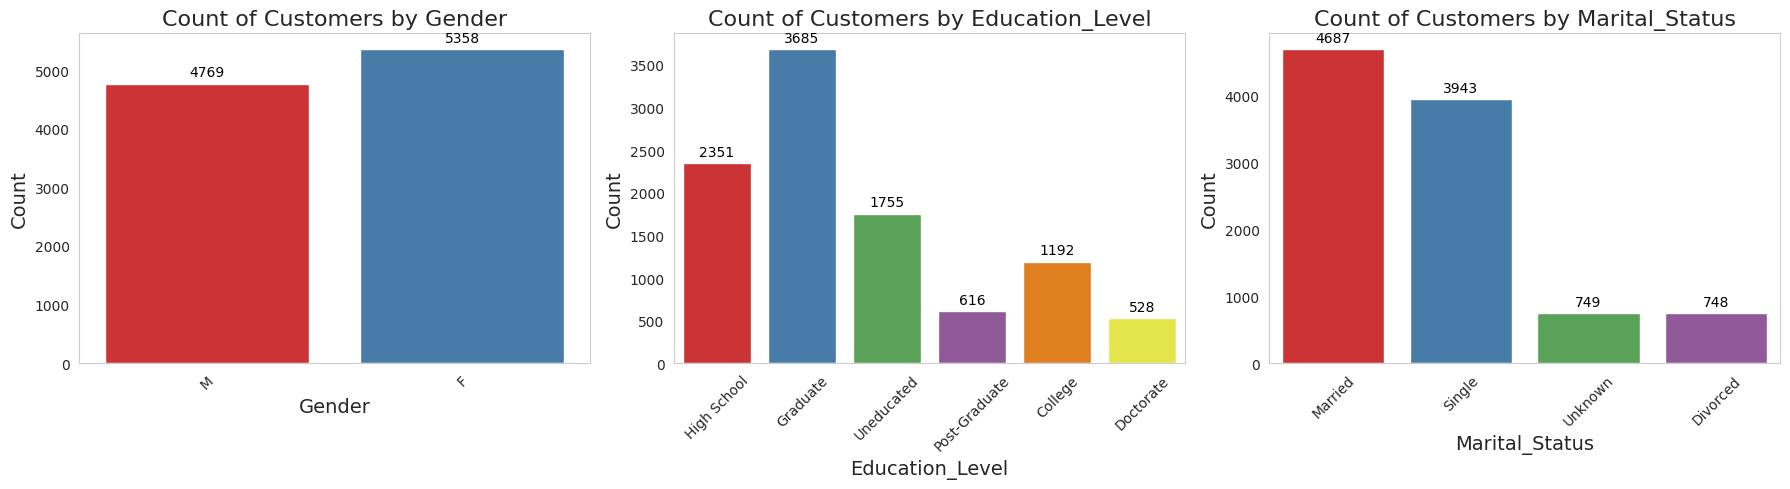

In [7]:
# Define the number of subplots (1 row, 3 columns)
num_rows = 1
num_cols = 3

# Create a row with three columns of bar graphs
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5))

# Iterate through categorical columns and plot count bar graphs
for idx, col in enumerate(categorical_columns):
    ax = axes[idx]  # Get the current subplot
    
    # Plot a count bar graph
    sns.countplot(data=customer, x=col, palette='Set1', ax=ax)
    
    # Add count values inside the bars
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(
            f'{int(height)}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords='offset points',
            ha='center', va='bottom', fontsize=10, color='black'
        )
    
    # Customize subplot appearance
    ax.set_title(f'Count of Customers by {col.title()}', fontsize=16)
    ax.set_xlabel(col.title(), fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.yaxis.grid(False)  # Remove y-axis grid

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

- The ```Gender``` column comprises 5,358 females and 4,769 males.The dataset has a relatively balanced distribution of gender, with slightly more females than males.

- The majority of customers have a graduate education level (3,685 customers), followed by a substantial number with a high school education level (2,351 customers), and a smaller portion with an undergraduate education level (1,755 customers).This suggests a diverse educational background among customers.

- There are 4,687 married customers and 3,943 single customers. The remaining customers are evenly distributed under the 'unknown' category indicates a potential lack of available information for some customers.

In [8]:
# Create a modified copy of the customer DataFrame
customers_modif = customer.copy()

# Convert the 'gender' column to binary values: 1 for 'M' and 0 for other values
customers_modif['gender'] = customer['gender'].apply(lambda x: 1 if x == 'M' else 0)

# Display the first few rows of the modified 'gender' column
modified_gender_column = customers_modif['gender']
print(modified_gender_column.head())

0    1
1    0
2    1
3    0
4    1
Name: gender, dtype: int64


In [9]:
# Mapping of education levels to numerical values
education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}

# Replace education levels with numerical values using the mapping
customers_modif['education_level'].replace(to_replace=education_mapping, inplace=True)

# Display the first few rows of the modified 'education_level' column
modified_education_column = customers_modif['education_level']
print(modified_education_column.head())

0    1
1    3
2    3
3    1
4    0
Name: education_level, dtype: int64


In [10]:
# Create dummy variables for 'marital_status' and dropping the first category
dummies = pd.get_dummies(customers_modif[['marital_status']], drop_first=True)

# Add the dummy variables to the modified DataFrame
customers_modif = pd.concat([customers_modif, dummies], axis=1)

# Drop the original 'marital_status' column
customers_modif.drop(['marital_status'], axis=1, inplace=True)

# Display the shape of the modified DataFrame
modified_shape = customers_modif.shape
print("Rows and columns of the modified DataFrame:", modified_shape)

# Display the first few rows of the modified DataFrame
print('\n')
modified_head = customers_modif.head()
print(modified_head)

Rows and columns of the modified DataFrame: (10127, 16)


   customer_id  age  gender  dependent_count  education_level  \
0    768805383   45       1                3                1   
1    818770008   49       0                5                3   
2    713982108   51       1                3                3   
3    769911858   40       0                4                1   
4    709106358   40       1                3                0   

   estimated_income  months_on_book  total_relationship_count  \
0             69000              39                         5   
1             24000              44                         6   
2             93000              36                         4   
3             37000              34                         3   
4             65000              21                         5   

   months_inactive_12_mon  credit_limit  total_trans_amount  \
0                       1       12691.0                1144   
1                       1        8

After performing one-hot encoding to create dummy variables, the total number of columns increases from 13 to 16.

# Data Scaling: Standardization

It's important to note that the DataFrame contains features with different scales. For instance, the ```estimated_income``` column includes values ranging from dozens to hundreds of thousands, while the ```dependent_count``` column contains values ranging from 1 to 5.

To address this, we will normalize the dataset using the ```StandardScaler()```from scikit-learn. The ```StandardScaler()``` function will transform the features in the dataset so that they share a common scale. This will result in each feature having a mean of 0 and a standard deviation of 1.

In [11]:
# Extract features for X by dropping the 'customer_id' column
X = customers_modif.drop('customer_id', axis=1)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(X)

# Transform the features using the scaler
X_scaled = scaler.transform(X)

# Display the first five scaled data points
first_five_scaled = X_scaled[:5]
print("First five scaled data points:\n", first_five_scaled)

First five scaled data points:
 [[-0.16540558  1.05995565  0.50336813 -0.75221102  0.1758098   0.38462088
   0.76394261 -1.32713603  0.4466219  -0.95970657 -0.97389518 -0.77588223
   1.07733799 -0.79850685 -0.28260887]
 [ 0.33357038 -0.9434357   2.04319867  0.66278684 -0.96716585  1.01071482
   1.40730617 -1.32713603 -0.04136665 -0.91643261 -1.35734038 -0.61627565
  -0.92821381  1.2523374  -0.28260887]
 [ 0.58305837  1.05995565  0.50336813  0.66278684  0.78539682  0.00896451
   0.12057905 -1.32713603 -0.5736978  -0.74098169 -1.91120566 -0.99715499
   1.07733799 -0.79850685 -0.28260887]
 [-0.78912553 -0.9434357   1.2732834  -0.75221102 -0.63697289 -0.24147306
  -0.52278451  1.64147829 -0.58525108 -0.95175829 -1.91120566  1.75968594
  -0.92821381 -0.79850685  3.53845931]
 [-0.78912553  1.05995565  0.50336813 -1.45970995  0.07421197 -1.86931731
   0.76394261 -1.32713603 -0.43087725 -1.05626345 -1.57036549 -0.99715499
   1.07733799 -0.79850685 -0.28260887]]


# Choosing the Number of Clusters (K)
With the dataset preprocessed and ready, the next step is to determine the optimal number of clusters for segmentation using the inertia metric. This involves creating multiple models, calculating the inertia for each, and then visualizing the results using an Elbow Curve. The point on the curve where the inertia starts to level off helps us decide the suitable number of clusters for segmenting the customers. Once determined, we can proceed to perform the actual clusterization..

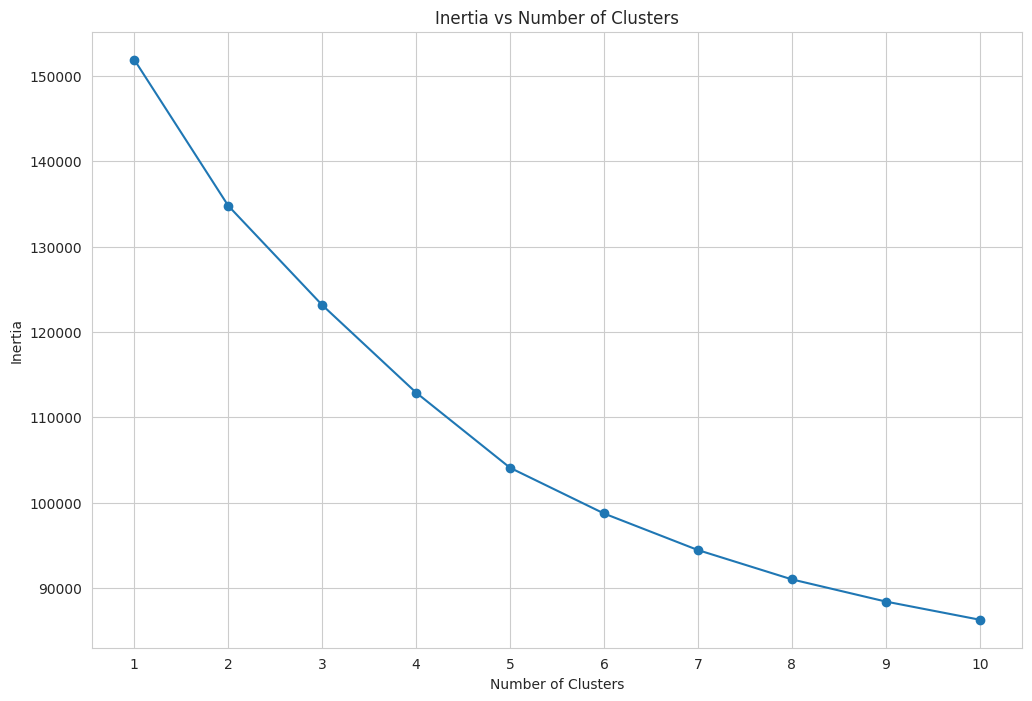

In [12]:
# Create a DataFrame from the scaled data
X = pd.DataFrame(X_scaled)

# Calculate inertia values for different numbers of clusters
inertias = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    y = model.fit_predict(X)
    inertia = model.inertia_
    inertias.append(inertia)

# Create a plot to visualize inertia values
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Observations:

- The relationship between inertia and the number of clusters is inversely proportional. This implies that as the number of clusters decreases, the inertia tends to increase.

- The rate of decrease in inertia appears to slow down between 4 and 6 clusters. 

We will generate bar graphs that display the percentage decrease in inertia. These graphs will help us determine the optimal number of clusters to use for our segmentation.



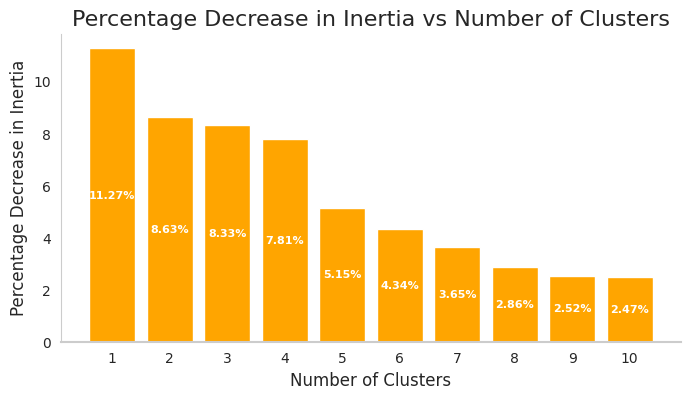

In [13]:
def calculate_percent_decrease(inertia_k, inertia_k_plus_1):
    """Calculate the percentage decrease in inertia between k and k+1 clusters."""
    return ((inertia_k - inertia_k_plus_1) / inertia_k) * 100

# Calculate the percentage decrease in inertia for each K value
percentages = []
for k in range(1, 11):
    kmeans_k = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeans_k_plus_1 = KMeans(n_clusters=k + 1, n_init=10).fit(X)
    
    inertia_k = kmeans_k.inertia_
    inertia_k_plus_1 = kmeans_k_plus_1.inertia_
    
    percent_decrease = calculate_percent_decrease(inertia_k, inertia_k_plus_1)
    percentages.append(percent_decrease)

# Create the bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(range(1, 11), percentages, color='orange')

# Add labels and title
plt.title('Percentage Decrease in Inertia vs Number of Clusters', size=16)
plt.ylabel('Percentage Decrease in Inertia', size=12)
plt.xlabel('Number of Clusters', size=12)
plt.xticks(range(1, 11))

# Add percentage labels to the bars
for i, val in enumerate(percentages):
    plt.text(bars[i].get_x() + bars[i].get_width() / 2, 
             bars[i].get_height() / 2, 
             f'{val:.2f}%', 
             ha='center', 
             va='center', 
             color='white', 
             fontweight='bold',
             fontsize=8)

# Customize plot appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Remove the grid
plt.grid(False)

plt.show()

After analyzing the bar plot, we've noticed a significant slowdown in the rate of inertia decrease beyond 5 clusters. Therefore, we will proceed with utilizing 5 clusters.

In [14]:
# Initialize the KMeans model with 5 clusters
model = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model to the scaled data and predict cluster labels
cluster_labels = model.fit_predict(X_scaled)

# Display the cluster labels
print(cluster_labels)

[1 0 1 ... 2 3 2]


# Analyzing Results

With the number of clusters chosen, our next step is to analyze the outcomes. This involves examining how the variables used in the clustering process vary across different clusters, allowing us to provide clearer explanations for each cluster's significance.

It's crucial to identify the key characteristics of each cluster and understand how they can influence business and marketing strategies tailored to each customer type.

To facilitate a deeper understanding of cluster characteristics, we will enhance our original dataset by creating a ```Cluster``` column. This modification will adjust the range from 1 to 5 (rather than 0 to 4) to better align with the cluster labels.

In [15]:
# Add cluster labels to the customer DataFrame and number the clusters from 1 to 5
customer['Cluster'] = cluster_labels + 1

# Display the modified customer DataFrame
print(customer)

       customer_id  age gender  dependent_count education_level  \
0        768805383   45      M                3     High School   
1        818770008   49      F                5        Graduate   
2        713982108   51      M                3        Graduate   
3        769911858   40      F                4     High School   
4        709106358   40      M                3      Uneducated   
...            ...  ...    ...              ...             ...   
10122    772366833   50      M                2        Graduate   
10123    710638233   41      M                2        Graduate   
10124    716506083   44      F                1     High School   
10125    717406983   30      M                2        Graduate   
10126    714337233   43      F                2        Graduate   

      marital_status  estimated_income  months_on_book  \
0            Married             69000              39   
1             Single             24000              44   
2            Married 

Let's create a plot to visualize the distribution of values within each cluster for better clarity

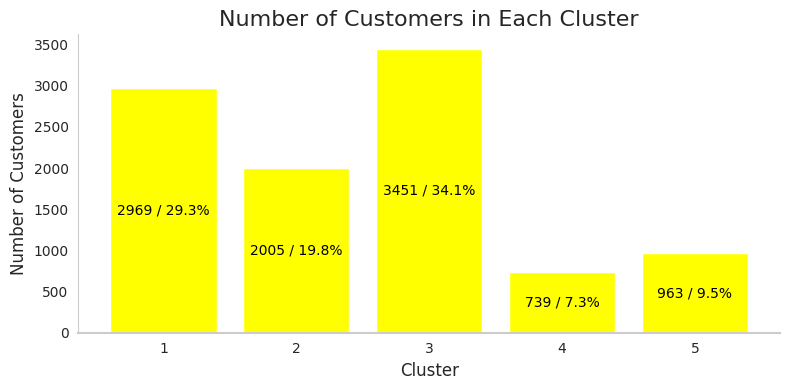

In [16]:
# Calculate the counts of customers in each cluster and the total number of customers
cluster_counts = customer['Cluster'].value_counts()
total_customers = len(customer)

# Create the bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='yellow')

# Add labels and title
plt.title('Number of Customers in Each Cluster', size=16)
plt.ylabel('Number of Customers', size=12)
plt.xlabel('Cluster', size=12)
plt.xticks(cluster_counts.index)

# Add count labels and percentages to the bars
for i, count in enumerate(cluster_counts):
    percentage = (count / total_customers) * 100
    plt.text(
        bars[i].get_x() + bars[i].get_width() / 2, 
        bars[i].get_height() / 2,  # Adjust the vertical position
        f'{count} / {percentage:.1f}%',  # Display count and percentage
        ha='center', 
        va='center', 
        color='black',
        fontsize=10
    )

# Customize plot appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Remove the grid
plt.grid(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

It's evident that a significant portion of the dataset falls into cluster 3(3,451 customers or 34.1% of the dataset), followed by the second largest portion in cluster 1(2,969 customers or 29.3% of the dataset), while cluster 4 contains the smallest segment(739 customers or 7.3% of the dataset).

Let's now interpret and summarize the unique characteristics of each cluster, highlighting their distinctions based on the variables used for segmentation.

To begin, we'll establish a foundational reference for analyzing cluster-specific means by plotting the average of all numerical values in the dataset. Afterward, we'll delve into the behavior of numerical variables within each cluster. This involves iterating through the list of numerical columns. For each column, we'll group the data by the 'Cluster' column and generate bar charts illustrating the average values of the column for each specific cluster. This approach simplifies the comparison of means across clusters, enabling us to identify notable differences or similarities in the data. This method uncover underlying patterns and relationships in the dataset, thereby facilitating informed decision-making and the development of data-driven strategies.

Let's commence by plotting the means of all numerical columns:

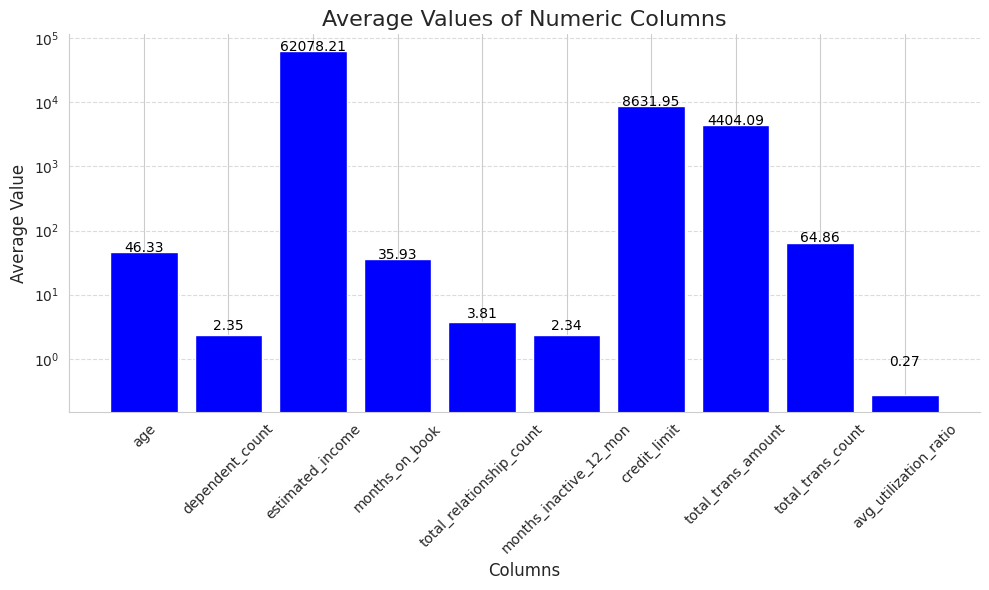

In [17]:
# Get numeric columns excluding 'customer_id' and 'Cluster'
numeric_columns = customer.select_dtypes(include=np.number).drop(['customer_id', 'Cluster'], axis=1).columns

# Calculate the mean for each numeric column
column_means = customer[numeric_columns].mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(column_means.index, column_means.values, color='blue')

# Add labels and title
plt.title('Average Values of Numeric Columns', size=16)
plt.ylabel('Average Value', size=12)
plt.xlabel('Columns', size=12)
plt.xticks(rotation=45)

# Add average values on top of bars
for i, value in enumerate(column_means):
    plt.text(
        bars[i].get_x() + bars[i].get_width() / 2,
        bars[i].get_height() + 0.5,  # Adjust the vertical position
        f'{value:.2f}',  # Format the value to two decimal places
        ha='center',
        color='black',
        fontsize=10
    )

# Set y-axis to use a logarithmic scale
plt.yscale('log')

# Customize plot appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

This plot shows the average values of each numerical column. It helps us understand if the cluster's values are higher or lower than the average and guide us in creating specific strategies for each cluster.

Next, let's examine the average values of the numerical columns for each cluster.

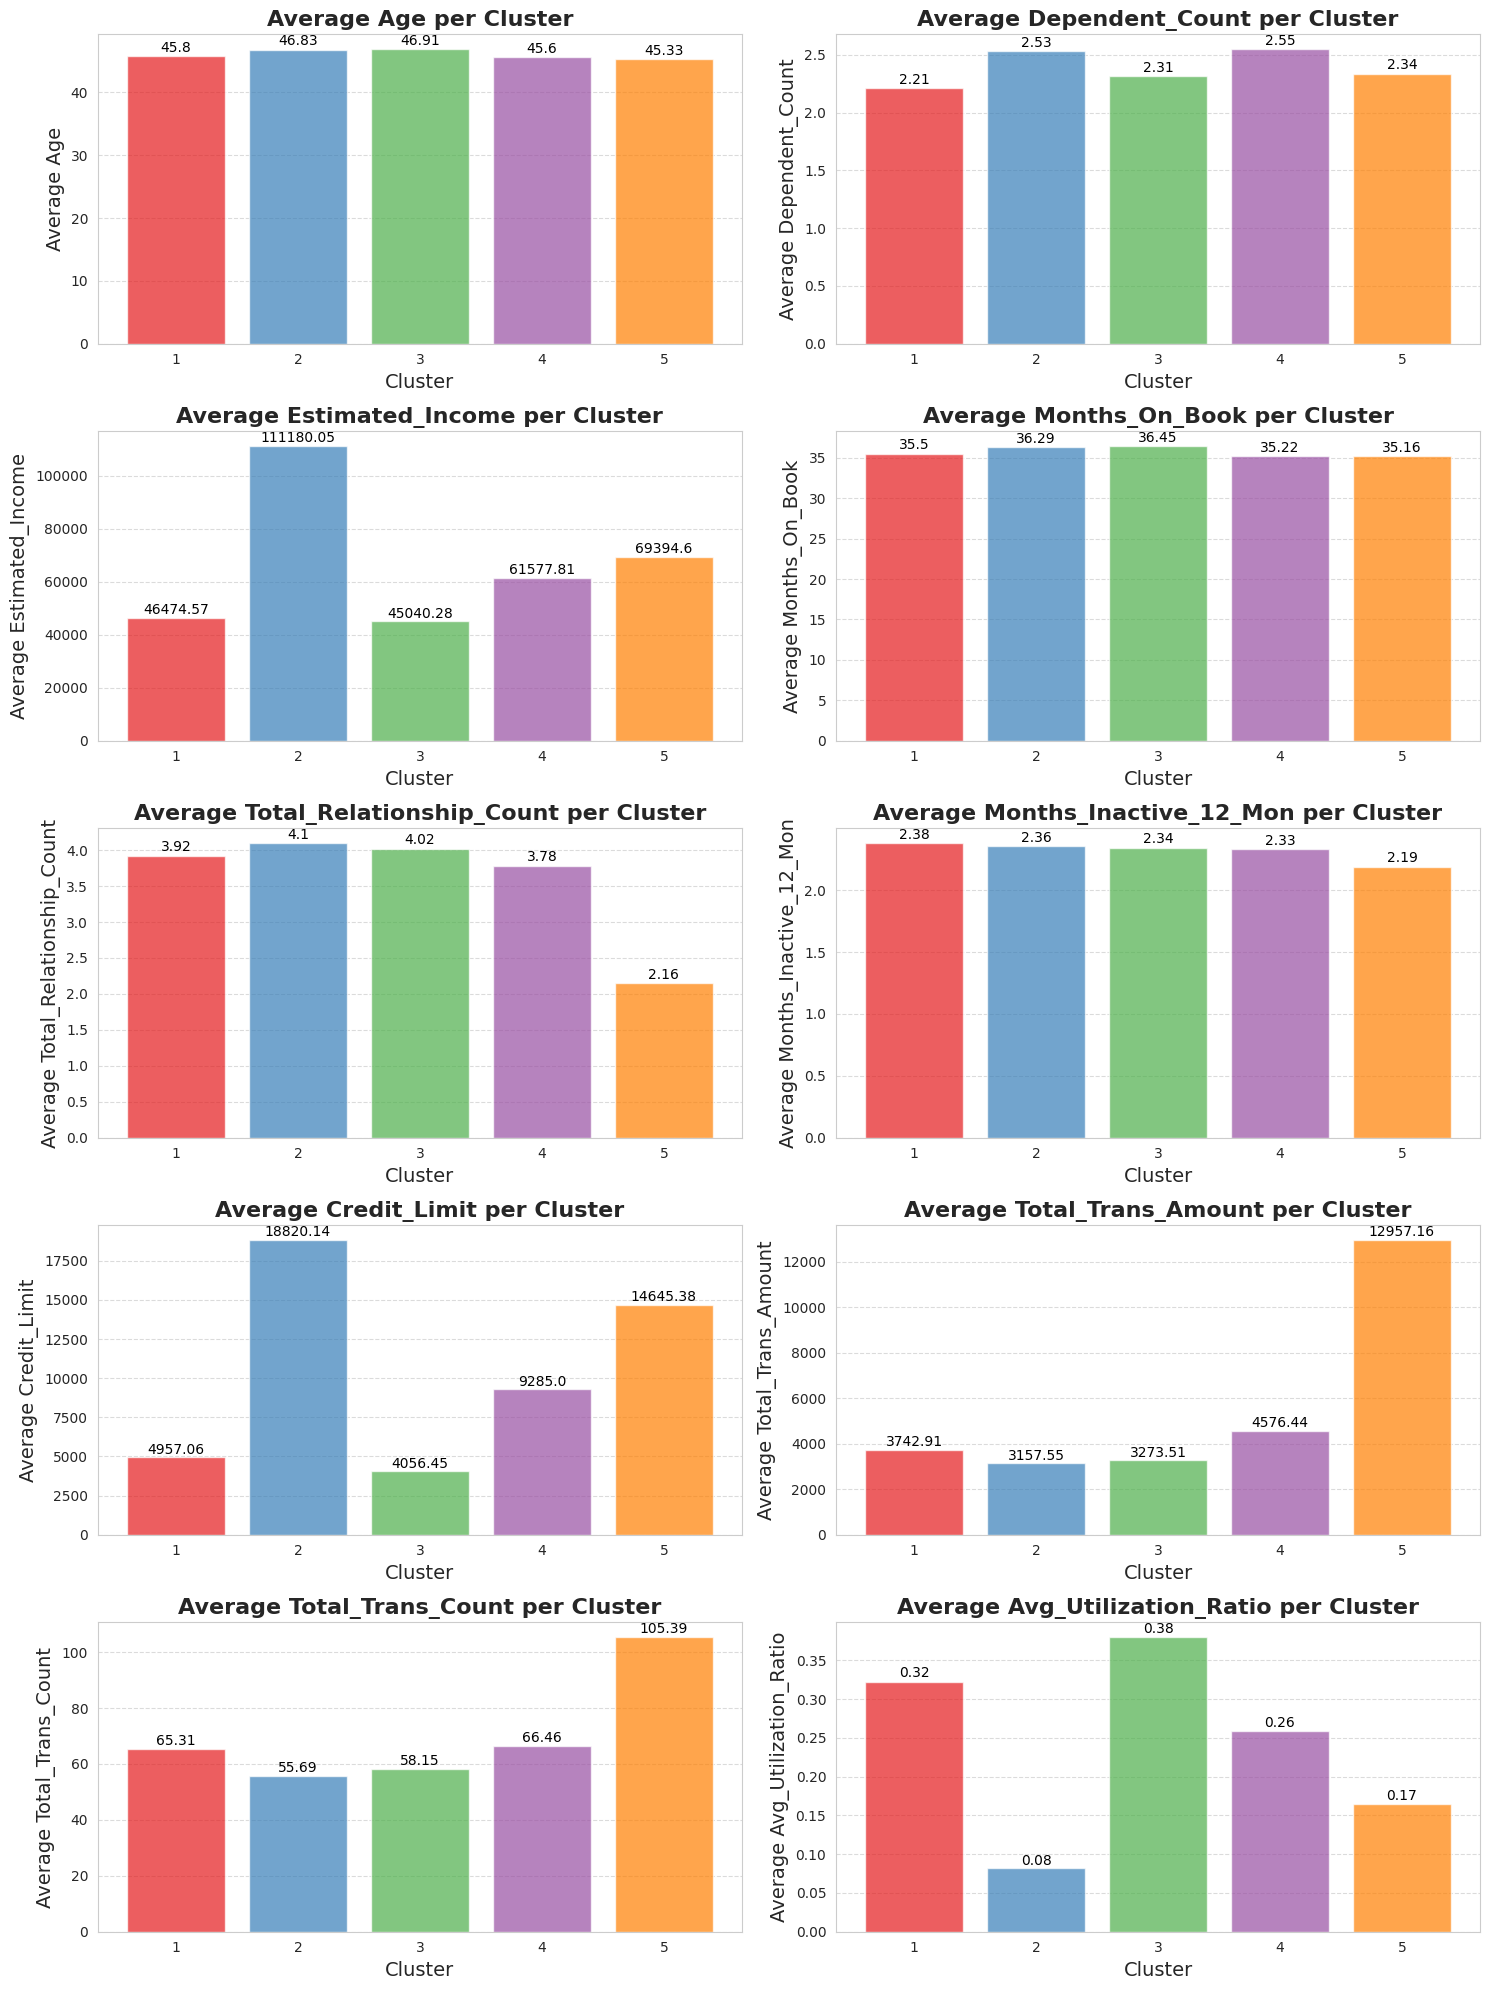

In [18]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
colors = sns.color_palette('Set1')

# Plot average values for each numeric column in each cluster
for idx, column in enumerate(numeric_columns):
    # Group data by cluster and calculate average for the current numeric column
    df_plot = customer.groupby('Cluster')[column].mean()
    
    # Get the current subplot
    ax = axes[idx // 2, idx % 2]
    
    # Create bar plots with average values
    bars = ax.bar(df_plot.index, df_plot, color=colors, alpha=0.7)
    
    # Customize subplot appearance
    ax.set_title(f'Average {column.title()} per Cluster', fontsize=16, weight='bold')
    ax.set_xlabel('Cluster', fontsize=14)
    ax.set_ylabel(f'Average {column.title()}', fontsize=14)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.set_xticks(df_plot.index)
    
    # Add numeric values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005 * yval,
                round(yval, 2), ha='center', va='bottom', color='black')

# Remove any empty subplots
for i in range(len(numeric_columns), 10):
    fig.delaxes(axes.flatten()[i])

# Improve layout and display the plots
plt.tight_layout()
plt.show()

Some key insights from the charts:

- The distribution of customer ages across all clusters is quite consistent, with most falling between 45 and 47 years old.

- Each cluster exhibits an average number of dependents above 2, ranging from 2.21 to 2.55.

- The average customer tenure with the company is notably consistent across clusters, ranging from 35.16 to 36.45 months.

- The average period of credit card inactivity (more than 2 months) within the last year is similar for all clusters, ranging from 2.19 to 2.38 months.

- Cluster 1 stands out with low estimated income, credit limit, transaction amount, and high utilization ratio.

- Cluster 2 exhibits the highest estimated income, long tenure with the company, highest credit limit, and most customer contacts. However, it demonstrates lower spending and usage metrics, including the lowest amount spent, card uses, and daily utilization ratio.

- Cluster 3 reflects the low income, credit limit, card spending, and card usage frequency, coupled with the highest utilization ratio.

- Cluster 4's numerical features align closely with the dataset's overall averages.

-  Cluster 5 has the second-highest credit limit and an average estimated income of $\$69,394.60$. While this is higher than the overall average estimated income of $\$62,078.21$, it is significantly lower than Cluster 4's $\$111,180.05$. Moreover, Cluster 5 demonstrates the highest card usage frequency and the largest spending amount.

Now that we have a clear understanding of each cluster, we can leverage this knowledge to make informed business decisions. For example, customers within cluster 3 exhibit a high income but the lowest spending score, suggesting potential for increased spending with our company.

Building on this understanding, our next steps involve generating scatter plots that focus on pairs of variables with strong correlations, differentiated by distinct colors to represent each cluster. Subsequently, we will formulate targeted campaigns tailored to each cluster, aiming to encourage higher spending. The variables under consideration are:

- ```age``` and ```months_on_book```
- ```total_trans_amount``` and ```total_trans_count```
- ```credit_limit``` and ```estimated_income```
- ```credit_limit``` and ```avg_utilization_ratio```

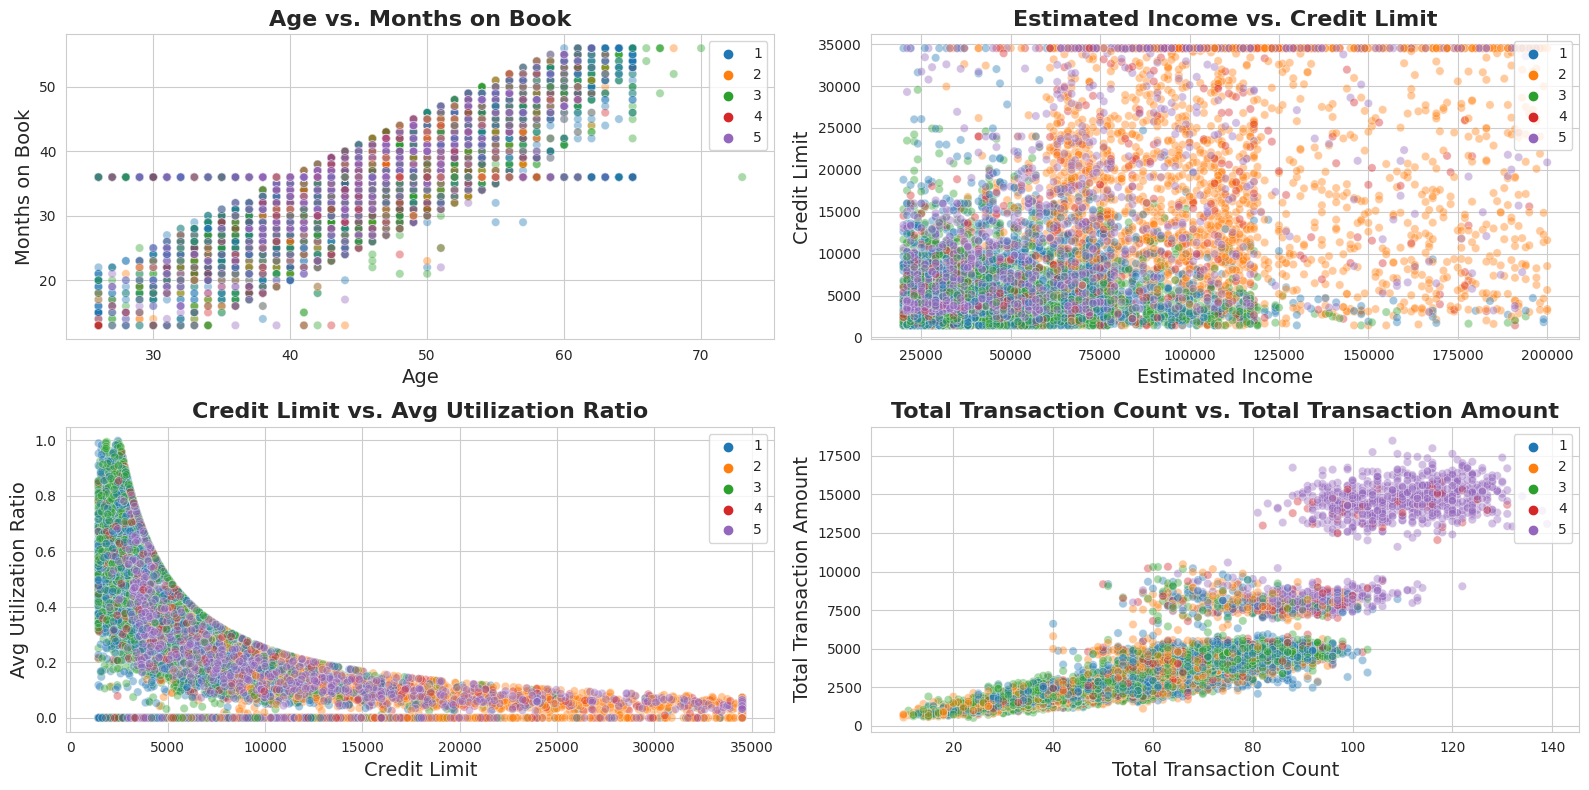

In [19]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Subplot 1: Age vs. Months on Book
sns.scatterplot(x='age', y='months_on_book', hue='Cluster', data=customer, palette='tab10', alpha=0.4, ax=axes[0, 0])
axes[0, 0].set_title('Age vs. Months on Book', fontsize=16, weight='bold')
axes[0, 0].set_xlabel('Age', fontsize=14)
axes[0, 0].set_ylabel('Months on Book', fontsize=14)
axes[0, 0].legend(loc='upper right')

# Subplot 2: Estimated Income vs. Credit Limit
sns.scatterplot(x='estimated_income', y='credit_limit', hue='Cluster', data=customer, palette='tab10', alpha=0.4, ax=axes[0, 1])
axes[0, 1].set_title('Estimated Income vs. Credit Limit', fontsize=16, weight='bold')
axes[0, 1].set_xlabel('Estimated Income', fontsize=14)
axes[0, 1].set_ylabel('Credit Limit', fontsize=14)
axes[0, 1].legend(loc='upper right')

# Subplot 3: Credit Limit vs. Avg Utilization Ratio
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='Cluster', data=customer, palette='tab10', alpha=0.4, ax=axes[1, 0])
axes[1, 0].set_title('Credit Limit vs. Avg Utilization Ratio', fontsize=16, weight='bold')
axes[1, 0].set_xlabel('Credit Limit', fontsize=14)
axes[1, 0].set_ylabel('Avg Utilization Ratio', fontsize=14)
axes[1, 0].legend(loc='upper right')

# Subplot 4: Total Transaction Count vs. Total Transaction Amount
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='Cluster', data=customer, palette='tab10', alpha=0.4, ax=axes[1, 1])
axes[1, 1].set_title('Total Transaction Count vs. Total Transaction Amount', fontsize=16, weight='bold')
axes[1, 1].set_xlabel('Total Transaction Count', fontsize=14)
axes[1, 1].set_ylabel('Total Transaction Amount', fontsize=14)
axes[1, 1].legend(loc='upper right')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

From the scatter plots, we can see the following patterns and characteristics of the clusters:

- ```age``` and ```months_on_book```: in Cluster 5, younger customers with shorter tenures align with lower utilization ratios and higher spending tendencies. Conversely, Cluster 3's older demographic corresponds to higher utilization ratios and lower spending tendencies.

- ```total_trans_amount``` and ```total_trans_count```: higher transaction amounts often accompany higher transaction counts. Cluster 5 demonstrates increased transaction frequency, while Clusters 1, 2, and 3 show lower engagement with smaller individual transaction amounts. Cluster 4 appears to be moderately spread out across the plot.

- ```credit_limit``` with ```estimated_income``` and ```credit_limit``` and ```avg_utilization_ratio```: the presence of higher credit limits tends to associate with higher estimated incomes and lower avg_utilization_ratios. Clusters 2, 3, and 5 demonstrate these trends.


These scatter plot insights provide a nuanced view of how the key characteristics identified earlier interact and contribute to distinct customer behavior within each cluster. 

Now, we need to understand how the categorical columns - ```gender```, ```education_level```, and ```marital_status``` - impact the distribution of clusters. Unlike numerical columns, a scatter plot wouldn't provide much insight when analyzing categorical data, even if you converted the text values into numeric representations. Therefore, our goal is to visualize the percentage of each category within each of the five clusters.

To achieve this, we'll utilize the ```pandas.crosstab```function. This function performs cross-tabulation to calculate the frequency distribution of one variable given another.

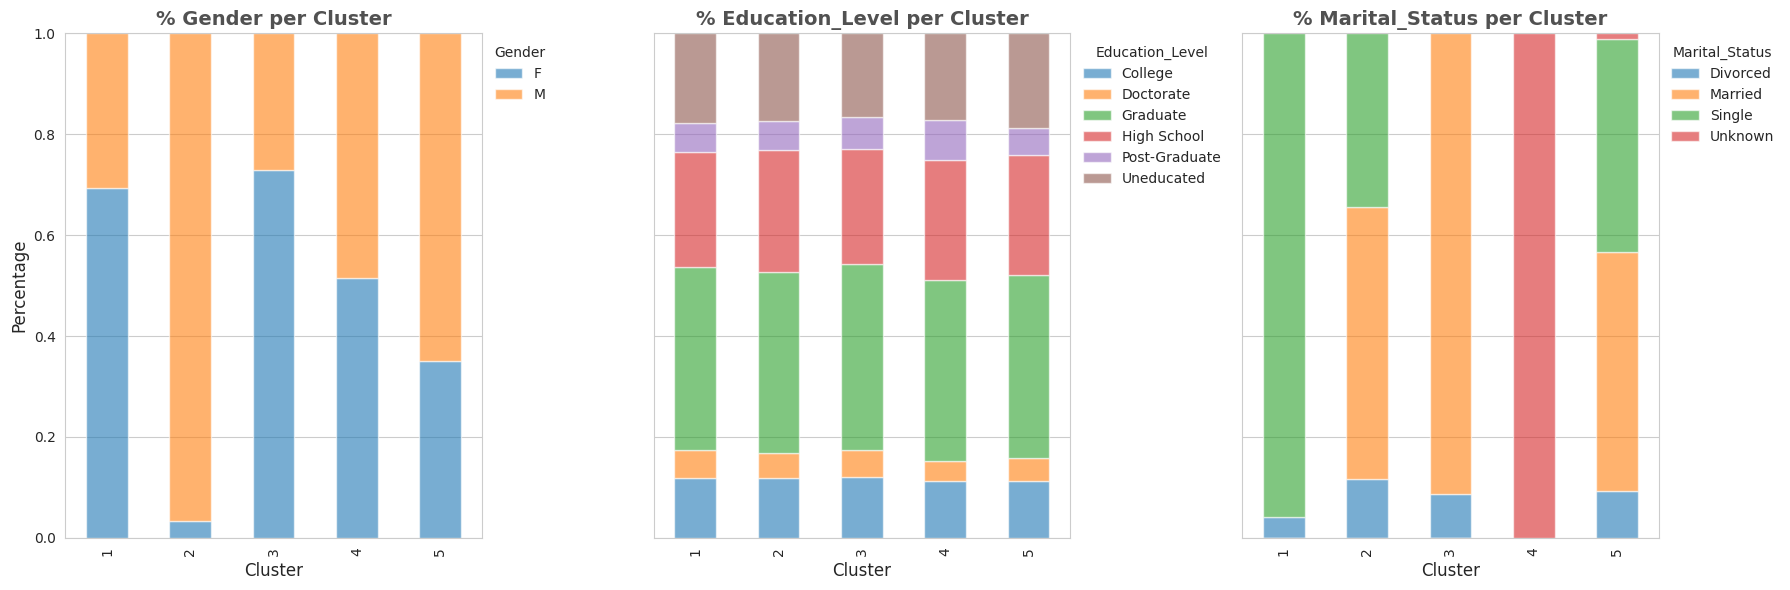

In [20]:
# Select categorical columns
cat_columns = customer.select_dtypes(include=['object'])

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
colors = sns.color_palette('tab10')

# Plot percentage distribution for each categorical column in each cluster
for i, col in enumerate(cat_columns):
    # Create a cross-tabulation to calculate percentage distribution
    plot_df = pd.crosstab(index=customer['Cluster'], columns=customer[col], values=customer[col], aggfunc='size', normalize='index')
    
    # Get the current subplot
    ax = axes[i]
    
    # Create stacked bar plots
    plot_df.plot.bar(stacked=True, ax=ax, color=colors, alpha=0.6)
    
    # Customize subplot appearance
    ax.set_title(f'% {col.title()} per Cluster', fontsize=14, weight='bold', alpha=0.8)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel('Percentage', fontsize=12)
    ax.legend(title=col.title(), frameon=False, loc='upper left', bbox_to_anchor=(1, 1))
    ax.xaxis.grid(False)
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Characteristics and Strategies for Each Cluster

We have successfully classified customers into five distinct clusters and highlighted key characteristics of each. Interestingly, education levels are well-distributed across the clusters. In addition to this, here are notable highlights and potential strategies for each cluster:

#### Cluster 1
Characteristics:

- Comprises 29.3% of the dataset, predominantly female, with a significant number of singles.
- Low estimated income, credit limit, and transaction amounts, coupled with a high utilization rate.

Strategy:

- Provide targeted promotional offers, exclusive discounts, and rewards to incentivize higher spending.
- Consider extending slightly higher credit limits.

#### Cluster 2
Characteristics:

- Encompasses 19.8% of the dataset, primarily male, with many individuals having single or married statuses.
- High estimated income and credit limit, with low transaction amounts and utilization rates.

Strategy:

- Target individuals (mainly men) with substantial income and credit limits who underutilize their cards.
- Offer premium rewards, personalized investment services, and enticing benefits to encourage card usage.

#### Cluster 3
Characteristics:

- Represents 34.1% of the dataset, predominantly female, with a considerable number of married individuals.
- Low estimated income, credit limit, transaction amounts, and a high utilization rate.

Strategy:

- Focus on married individuals (primarily women) with modest income and credit limits, yet substantial credit utilization for select purchases. 
- Gradually increase credit limits for responsible users and provide tailored rewards for essential expenditures.

#### Cluster 4
Characteristics:

- Accounts for 7.3% of the dataset, with a relatively even distribution of both male and female customers and unknown marital status.
- Average estimated income,  credit limit, transaction amounts, and utilization rate.

Strategy:

- Address individuals, regardless of gender, with low credit limits but carrying high balances.
- Consider enhancing credit limits, offering targeted promotions, and introducing cashback incentives for essential spending.


#### Cluster 5
Characteristics:

- Constitutes 9.5% of the dataset, mostly male, with many individuals having single or married statuses.
- Above average estimated income, high credit limit, transaction amounts, and a relatively low utilization rate.

Strategy:

- Engage individuals with substantial card spending, despite having an average estimated income.
- Introduce options for low-interest financing, tailor premium rewards and benefits, and provide cashback incentives for significant purchases.

# Conclusion
Overall, we analyzed customer data to segment the base into 5 clusters using K-Means clustering. We discovered unique characteristics for each cluster, such as spending behaviors, income levels, and credit utilization. These insights drove tailored business strategies, including targeted promotions, credit limit adjustments, and personalized rewards. By aligning marketing efforts with specific customer needs, businesses can enhance engagement and drive growth.